 #   Projekt: Detekcja obiektów na obrazie 
### Autor: Rafał Ziemianek

In [6]:
#import
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from skimage import io,img_as_ubyte,filters
from scipy import ndimage as ndi
from scipy.spatial import distance
from operator import itemgetter
import cv2
import math

In [7]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

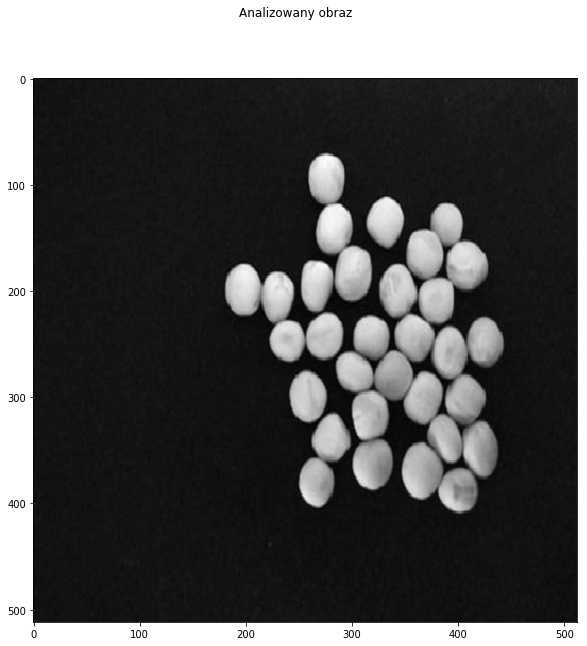

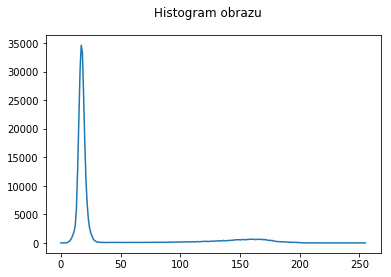

In [62]:
#wczytanie obrazu
from skimage.color import rgb2gray
image = io.imread( './images/test15.jpg')
image = rgb2gray(image)
image = img_as_ubyte(image)

plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.suptitle('Analizowany obraz')
plt.axis('on')
plt.show()


bins=np.arange(0, 257)
histo = np.histogram(image, bins=bins)
hist, bins = histo

plt.plot(bins[:-1], hist)
plt.suptitle('Histogram obrazu')
plt.show()


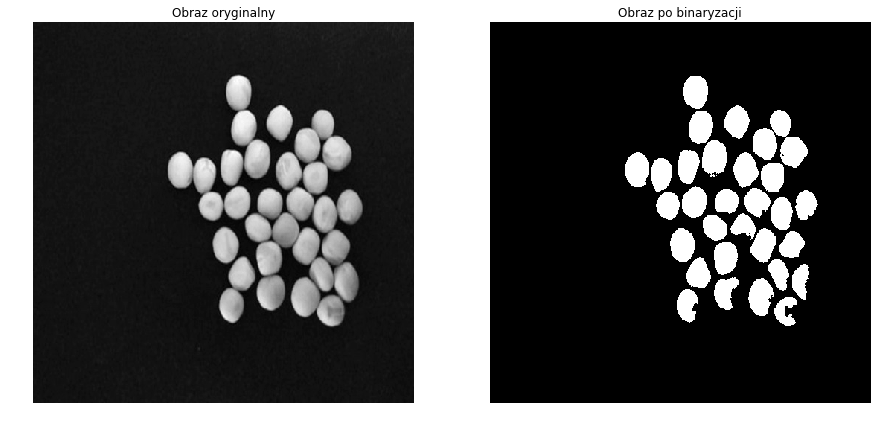

In [63]:
#binaryzacja
th = 120
th, bim = cv2.threshold(image, thresh=th, maxval=255, type=cv2.THRESH_BINARY)

show2imgs(image, bim, title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(15,15))

In [64]:
#Liczenie procentowe obektów na obrazie
def licz (pic):
    licznik,full =0,0
    
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            full=full+1
            if pic[i,j] == 255:
                licznik =licznik+1
                
    wynik = (licznik/full)*100
    
    print("Punkty obiektów: ",licznik,"\npunkty całego obrazu: ",full)
    return print("wynik: %.2f" %wynik,"%")

print("Obiekty stanowią następującą część obrazu :")    
licz(bim)


Obiekty stanowią następującą część obrazu :
Punkty obiektów:  31234 
punkty całego obrazu:  262144
wynik: 11.91 %


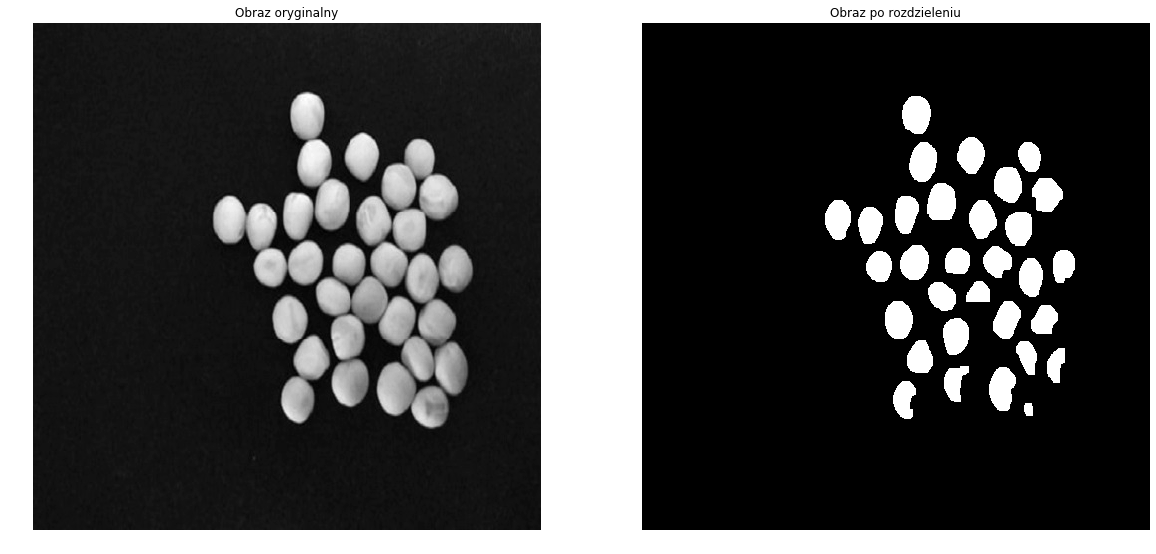

In [65]:
#Rozłączenie obiektów
element = np.ones((3,3),np.uint8)

openingIm = cv2.morphologyEx(bim, op=cv2.MORPH_OPEN, kernel=element, iterations=5)
openingIm = cv2.erode(openingIm,kernel=element,iterations=2)
show2imgs(image, openingIm, title1='Obraz oryginalny', title2='Obraz po rozdzieleniu', size=(20,20))

In [66]:
#liczenie obiektów na obrazie
label_objects, nb_labels = ndi.label(openingIm)

sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0

figures = mask_sizes[label_objects]

print("Wymiary obrazu : ",figures.shape)
print("Liczba obiektów na obrazie :",nb_labels)


Wymiary obrazu :  (512, 512)
Liczba obiektów na obrazie : 31


In [67]:
#liczenie punktów obiektów
def getFigure(labelledImage, objNumber):
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

In [68]:
#liczenie środka ciężkości
def cog(labelledImage, objNumber):
    cx = 0
    cy = 0
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                cy = cy + y
                cx = cx + x

    cx = cx / sizes[objNumber]
    cy = cy / sizes[objNumber]

    return int(cy), int(cx)

cogs = []
for i in range(nb_labels):
    cogs.append(cog(label_objects, i+1))

print(cogs)

[(93, 276), (133, 331), (140, 282), (135, 390), (163, 368), (173, 407), (181, 301), (192, 265), (198, 197), (198, 342), (203, 229), (207, 379), (242, 274), (241, 357), (240, 317), (245, 423), (246, 238), (256, 391), (272, 339), (275, 301), (299, 258), (299, 367), (299, 405), (316, 315), (338, 279), (337, 387), (345, 416), (363, 314), (368, 362), (379, 263), (389, 389)]


In [69]:
def cog2(points):
    mx=0
    my=0
    for (y,x) in points:
        mx = mx + x
        my = my + y
    mx = mx/len(points)
    my = my/len(points)
    
    return [my, mx]

In [70]:
#rysowanie środków ciężkości
def drawMarkers(image, coords):

    image = np.copy(image)
    
    for item in coords:
        y,x = item
        for j in range(y-4, y+4):
            image[j,x] = 0
        for i in range(x-4, x+4):
            image[y,i] = 0
            
    return image

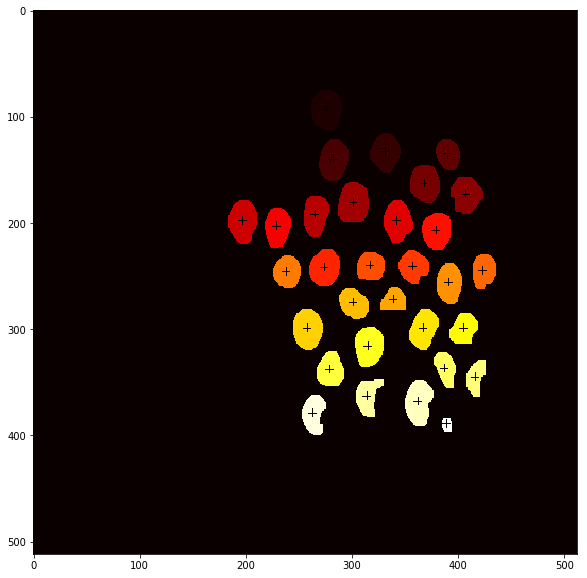

Liczba punktow:  886  Srodek ciezkosci:  [93.2234762979684, 276.0270880361174]
Liczba punktow:  792  Srodek ciezkosci:  [133.68939393939394, 331.3787878787879]
Liczba punktow:  866  Srodek ciezkosci:  [140.65704387990763, 282.65704387990763]
Liczba punktow:  536  Srodek ciezkosci:  [135.2929104477612, 390.2779850746269]
Liczba punktow:  815  Srodek ciezkosci:  [163.0871165644172, 368.64171779141105]
Liczba punktow:  801  Srodek ciezkosci:  [173.3932584269663, 407.44943820224717]
Liczba punktow:  928  Srodek ciezkosci:  [181.4698275862069, 301.1573275862069]
Liczba punktow:  737  Srodek ciezkosci:  [192.83310719131615, 265.68385345997285]
Liczba punktow:  869  Srodek ciezkosci:  [198.43037974683546, 197.1162255466053]
Liczba punktow:  825  Srodek ciezkosci:  [198.37212121212121, 342.9175757575758]
Liczba punktow:  733  Srodek ciezkosci:  [203.96725784447477, 229.68349249658937]
Liczba punktow:  772  Srodek ciezkosci:  [207.50777202072538, 379.6295336787565]
Liczba punktow:  800  Srodek 

In [71]:
lo = drawMarkers(label_objects, cogs)
plt.figure(figsize=(10,10))
plt.imshow(lo,cmap='hot')
plt.show()

for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    print('Liczba punktow: ',len(pts),' Srodek ciezkosci: ',cog2(pts))


In [72]:
#Współczynnk Blaira-Blissa
def computeBB(points):
    s = len(points)
    my,mx = cog2(pts)
    
    r = 0
    for point in points:
         r = r + distance.euclidean(point,(my,mx))**2
            
    return s/(math.sqrt(2*math.pi*r))

In [73]:
#współczynnik Fereta
def computeFeret(points):
    
    px = [x for (y,x) in points]
    py = [y for (y,x) in points]
    
    fx = max(px) - min(px)
    fy = max(py) - min(py)
    
    return float(fy)/float(fx)    

In [74]:
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    bb = computeBB(pts)
    feret = computeFeret(pts)
    
    print('Blair-Bliss: ', bb,'\nFeret: ',feret, '\n---')

Blair-Bliss:  0.9783631689908661 
Feret:  1.3214285714285714 
---
Blair-Bliss:  0.9795222375695138 
Feret:  1.2857142857142858 
---
Blair-Bliss:  0.9604626506133157 
Feret:  1.4444444444444444 
---
Blair-Bliss:  0.9699805061128013 
Feret:  1.3181818181818181 
---
Blair-Bliss:  0.9815859756233157 
Feret:  1.2962962962962963 
---
Blair-Bliss:  0.9814275739564998 
Feret:  1.1333333333333333 
---
Blair-Bliss:  0.9722674448876846 
Feret:  1.3214285714285714 
---
Blair-Bliss:  0.922579468476332 
Feret:  1.6521739130434783 
---
Blair-Bliss:  0.9527640437901196 
Feret:  1.5384615384615385 
---
Blair-Bliss:  0.9595625760134401 
Feret:  1.4444444444444444 
---
Blair-Bliss:  0.943699396061615 
Feret:  1.5416666666666667 
---
Blair-Bliss:  0.9799895279864456 
Feret:  1.3076923076923077 
---
Blair-Bliss:  0.9853446796690571 
Feret:  1.2142857142857142 
---
Blair-Bliss:  0.9889294557457416 
Feret:  1.1071428571428572 
---
Blair-Bliss:  0.9959045500873303 
Feret:  1.0 
---
Blair-Bliss:  0.95530230810